In [48]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import plot_images
from image_datasets import load_nist_data

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils import plot_images
from image_datasets import load_nist_data
from torchvision.utils import make_grid

def mnist_grid(sample, title=None, num_img=5, nrow=8, figsize=(10,10), save=False):
    _, ax= plt.subplots(1,1, figsize=figsize)
    sample = sample[:num_img]
    img = make_grid(sample, nrow=nrow)
    npimg = np.transpose(img.detach().cpu().numpy(),(1,2,0))
    plt.imshow(npimg)
    ax.set_xlabel(title)
    ax.set_xticks([])
    ax.set_yticks([])
    if save:
        plt.savefig( 'images/' + title + '.png', bbox_inches='tight', dpi=2000)

    plt.show()


def get_10_digits(images, labels):
  digits={}
  for i in range(10):
      digits[i] = images[labels == i]
  digits = torch.cat([
                    digits[1][0],
                    digits[2][0],
                    digits[3][0],
                    digits[4][0],
                    digits[5][0],
                    digits[6][0],
                    digits[7][0],
                    digits[8][0],
                    digits[9][0]
                    ], dim=0)  
  digits = digits.unsqueeze(1)
  return digits


import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
# Assume make_grid is already defined/imported

def plot_combined_with_mnist_grid(sample, fid_3, fid_avg, distortion, loc='lower right', log=False, figsize=(10, 6)):
    _ , ax = plt.subplots(1, 2, figsize=figsize)
    sample = sample[:9] 
    img = make_grid(sample, nrow=3)
    npimg = np.transpose(img.detach().cpu().numpy(), (1, 2, 0))
    ax[0].imshow(npimg)
    ax[0].set_xticks([])
    ax[0].set_yticks([])  
    ax[0].set_xlabel('MNIST + ' + distortion, fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    ax[1].plot(list(fid_3.keys()), list(fid_3.values()), color='darkred', label='last layer')
    ax[1].plot(list(fid_avg.keys()), list(fid_avg.values()), color='darkred', ls='--', label='average')
    ax[1].set_ylabel(r'Frechet Distance', fontsize=8)
    ax[1].set_xlabel('distortion level', fontsize=8)
    ax[1].legend(loc=loc, fontsize=8)
    if log:
        ax[1].set_yscale('log')
        ax[1].set_ylim(1, 5000)
        ax[1].set_yticks([1, 10, 100, 1000, 10000])
        ax[1].set_yticklabels(['1', '10', '100', '1000', r'$10^4$'])
    plt.savefig(distortion+'_combined_plot.png', bbox_inches='tight', dpi=2000)
    plt.show()

## Perturbed Binirezed MNIST 

We first define the reference sample as binarized MNIST (with binarization threshold of 0.5)

We now define the following perturbations:
- Pepper MNIST with binarizing thresholds different than 0.5 
- Gaussian noise 
- Gaussian Blurr
- Swirl deformation

We will later compute the FID between these datasets and the reference Pepper MNIST (binerized threshold=0.5) 

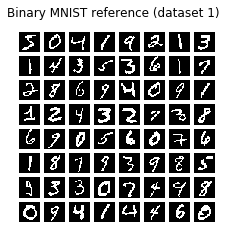

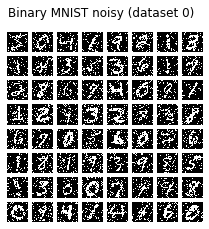

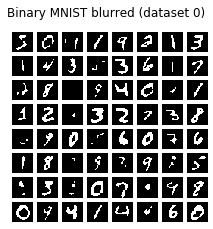

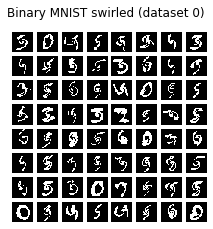

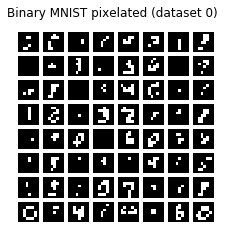

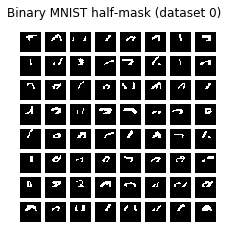

In [12]:
cmap='bone'

#...Reference dfataset:

data = load_nist_data(name='BinaryMNIST')
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST reference (dataset 1)", figsize=(3.5, 3.5), cmap=cmap)

#...Distorted datasets:

# data = load_nist_data(name='BinaryMNIST', distortion='binerize', level=0.1)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binaryr MNIST binerize=0.1", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='binerize', level=0.9)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST binerize=0.9", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='noise', level=0.4)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST noisy (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='blur', level=1.3)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST blurred (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='swirl', level=5)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST swirled (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='pixelize', level=0.7)
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST pixelated (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='crop', level=0.55)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST cropped (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

data = load_nist_data(name='BinaryMNIST', distortion='half_mask')
dataloader = DataLoader(data, batch_size=64, shuffle=False)
images, _ = next(iter(dataloader))
plot_images(images, "Binary MNIST half-mask (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='half_noisy', level=5)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST half-noisy (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

# data = load_nist_data(name='BinaryMNIST', distortion='half_pure_noise', level=5)
# dataloader = DataLoader(data, batch_size=64, shuffle=False)
# images, _ = next(iter(dataloader))
# plot_images(images, "Binary MNIST half pure noise  (dataset 0)", figsize=(3.5, 3.5), cmap=cmap)

##  LeNet-5 classifier for MNIST & Binary-MNIST
We load two pre-trained LeNet-5 classifiers and evaluate them on the Reference MNIST datasets to extract the mean and std of the features of intermediate layers. We look into two cases: 1) The standard MNIST dataset and 2) the "Pepper" or binarized MNIST dataset.

The trained LeNet-5 classifiers have classification accuracies above 98%.

1) MNIST classifier

In [2]:
import torch
from architectures import LeNet5
from fid_metric import compute_activation_statistics

device = 'cuda:0'
model = LeNet5(num_classes=10)
model.load_state_dict(torch.load('models/LeNet5_MNIST.pth'))
model.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='MNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_1, sigma_1 = compute_activation_statistics(model, test_ref, activation_layer='fc1', device=device)
mu_2, sigma_2 = compute_activation_statistics(model, test_ref, activation_layer='fc2', device=device)
mu_3, sigma_3 = compute_activation_statistics(model, test_ref, activation_layer='fc3', device=device)

In [4]:
from fid_metric import compute_fid

data = load_nist_data(name='MNIST',  train=False, distortion='binerize', level=0.5)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('binerize:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='noise', level=0.25)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('gaussian noise:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='blur', level=1.25)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('gaussian blur:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='swirl', level=3)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('swirl:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='pixelize', level=0.5)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('pixelize:    fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))

data = load_nist_data(name='MNIST', train=False, distortion='crop', level=0.55)
fid_1 = compute_fid(model, data, mu_ref=mu_1, sigma_ref=sigma_1, activation_layer='fc1', device=device)
fid_2 = compute_fid(model, data, mu_ref=mu_2, sigma_ref=sigma_2, activation_layer='fc2', device=device)
fid_3 = compute_fid(model, data, mu_ref=mu_3, sigma_ref=sigma_3, activation_layer='fc3', device=device)

print('crop:   fid layer 1 = {}    fid layer 2 = {}    fid layer 3 = {}'.format(fid_1, fid_2, fid_3))


binerize:    fid layer 1 = 2.825329542160034    fid layer 2 = 4.42305326461792    fid layer 3 = 1.986130952835083
gaussian noise:    fid layer 1 = 3.7916994094848633    fid layer 2 = 4.483862400054932    fid layer 3 = 2.843257188796997
gaussian blur:    fid layer 1 = 83.585693359375    fid layer 2 = 137.67227172851562    fid layer 3 = 65.88740539550781
swirl:    fid layer 1 = 44.86949920654297    fid layer 2 = 78.24354553222656    fid layer 3 = 58.88196563720703
pixelize:    fid layer 1 = 50.42639923095703    fid layer 2 = 83.87415313720703    fid layer 3 = 40.24601745605469
crop:   fid layer 1 = 80.99642181396484    fid layer 2 = 125.34374237060547    fid layer 3 = 73.65481567382812


2) Binary MNIST classifier

In [4]:
import torch
from architectures import LeNet5
from fid_metric import compute_activation_statistics

model_bin = LeNet5(num_classes=10)
model_bin.load_state_dict(torch.load('models/LeNet5_BinaryMNIST.pth'))
model_bin.eval()

#...Load MNIST test dataset

test_ref = load_nist_data(name='BinaryMNIST', train=False)

#...compute mean and std of features from reference data for each layer:

mu_bin_1, sigma_bin_1 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)
mu_bin_2, sigma_bin_2 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)
mu_bin_3, sigma_bin_3 = compute_activation_statistics(model_bin, test_ref, activation_layer='fc1', device=device)

## FID Experiments with LeNet-5

Below we compute the FID metric between the reference MNIST data and various distortion levels.
For the classifier we used the LeNet-5 architecture as above. We show that the FID computed from 
features in the second layer has a better separation power than the featuires extracted from
the first and third layers accross all considered deformation. 

Binary MNIST:

### 2. Gaussian noise

Binary MNIST:

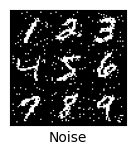

In [96]:
data = load_nist_data(name='BinaryMNIST', distortion='noise', level=0.3)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits_noise = get_10_digits(images, labels)
mnist_grid(digits_noise, title='Noise', num_img=9, nrow=3, figsize=(1.5,1.5), save=True)

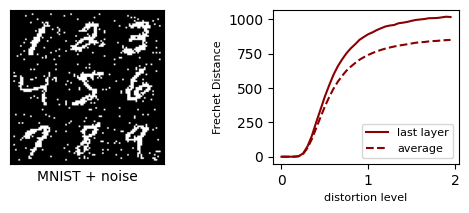

In [118]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1_noise = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc1', device=device)
fid_2_noise  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc2', device=device)
fid_3_noise  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='noise', values=np.arange(0.0, 2, 0.05), activation_layer='fc3', device=device)
fid_avg_noise  = {k: (fid_1_noise.get(k, 0) + fid_2_noise.get(k, 0) + fid_3_noise.get(k, 0) ) / 3.0 for k in fid_1_noise.keys()}


# make grid plots:

plot_combined_with_mnist_grid(digits_noise, 
                              fid_3_noise, 
                              fid_avg_noise, 
                              distortion='noise', figsize=(6, 2))

### 3. Gaussian blur

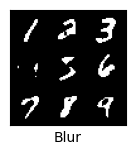

In [119]:
data = load_nist_data(name='BinaryMNIST', distortion='blur', level=1.5)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits_blur = get_10_digits(images, labels)
mnist_grid(digits_blur, title='Blur', num_img=9, nrow=3, figsize=(1.5,1.5), save=True)


Binary MNIST:

In [120]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1_blur = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc1', device=device)
fid_2_blur  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc2', device=device)
fid_3_blur  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='blur', values=np.arange(0.01, 10, 0.25), activation_layer='fc3', device=device)
fid_avg_blur = {k: (fid_1_blur.get(k, 0) + fid_2_blur.get(k, 0) + fid_3_blur.get(k, 0) ) / 3.0 for k in fid_1_blur.keys()}

plot_combined_with_mnist_grid(digits_blur, 
                              fid_3_blur, 
                              fid_avg_blur, 
                              distortion='blur', 
                              figsize=(6, 2))

KeyboardInterrupt: 

### 4. Swirl deformation

In [ ]:
data = load_nist_data(name='BinaryMNIST', distortion='swirl', level=3)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits_blur = get_10_digits(images, labels)
mnist_grid(digits_blur, title='Blur', num_img=9, nrow=3, figsize=(1.5,1.5), save=True)


Binary MNIST:

In [ ]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1_swirl = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 5, 0.075), activation_layer='fc1', device=device)
fid_2_swirl  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 5, 0.075), activation_layer='fc2', device=device)
fid_3_swirl  = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='swirl', values=np.arange(0, 5, 0.075), activation_layer='fc3', device=device)

fid_avg_swirl = {k: (fid_1_swirl.get(k, 0) + fid_2_swirl.get(k, 0) + fid_3_swirl.get(k, 0) ) / 3.0 for k in fid_1_swirl.keys()}

plot_combined_with_mnist_grid(digits_swirl  
                              fid_3_swirl , 
                              fid_avg_swirl , 
                              distortion='swirl', 
                              figsize=(6, 2))

### 5. Pixelization

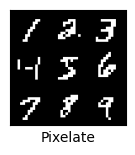

In [87]:
data = load_nist_data(name='BinaryMNIST', distortion='pixelize', level=0.5)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits_pix = get_10_digits(images, labels)
mnist_grid(digits_pix, title='Pixelate', num_img=9, nrow=3, figsize=(1.5,1.5), save=True)

Binary MNIST:

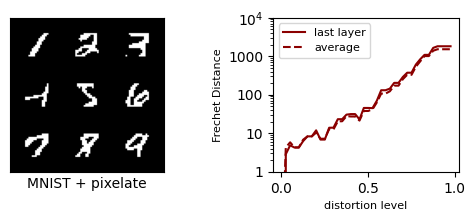

In [ ]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1_pix = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2_pix = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3_pix = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='pixelize', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fid_avg_pix = {k: (fid_1_pix.get(k, 0) + fid_2_pix.get(k, 0) + fid_3_pix.get(k, 0) ) / 3.0 for k in fid_1_pix.keys()}

plot_combined_with_mnist_grid(digits_pix, 
                              fid_3_pix, 
                              fid_avg_pix, 
                              distortion='pixelate',
                              loc='upper left', 
                              figsize=(6, 2))

### 6. Crop image

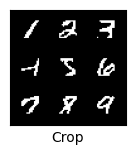

In [101]:
data = load_nist_data(name='BinaryMNIST', distortion='crop', level=0.5)
dataloader = DataLoader(data, batch_size=100, shuffle=False)
images, labels = next(iter(dataloader))
digits_pix = get_10_digits(images, labels)
mnist_grid(digits_pix, title='Crop', num_img=9, nrow=3, figsize=(1.5,1.5), save=True)

MNIST:

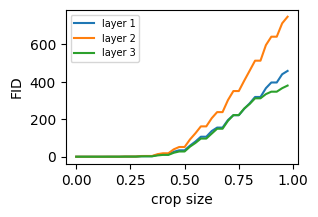

In [ ]:
import numpy as np
from fid_metric import fid_distorted_NIST

fid_1_crop = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc1', device=device)
fid_2_crop = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc2', device=device)
fid_3_crop = fid_distorted_NIST(model_bin, name='BinaryMNIST', distortion='crop', values=np.arange(0, 1, 0.025), activation_layer='fc3', device=device)

fid_avg_crop = {k: (fid_1_crop.get(k, 0) + fid_2_crop.get(k, 0) + fid_3_crop.get(k, 0) ) / 3.0 for k in fid_1_crop.keys()}


plot_combined_with_mnist_grid(digits_crop, 
                              fid_3_crop, 
                              fid_avg_crop, 
                              distortion='crop', figsize=(6, 2))

Binary MNIST: